# Milestone 2 - Phase 2 - FTDS (Offline)

## I. Introduction
- Peter Zultan
- HCK-001

## II. Dataset
Fake and News dataset
https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

## III. Objective
Fake news can change people opinions and cause hazardous action from people.

## IV. Import Libraries

In [ ]:
# Import Libraries
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import string
import wordcloud
import tensorflow as tf
import pickle

#preprocessing
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer,WordNetLemmatizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

#model
from tensorflow.keras.preprocessing import text, sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Dropout, GlobalAveragePooling1D, AveragePooling1D

#evaluation model
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## V. Data Loading

In [ ]:
fake = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/h8dsft_Milestone2P2_PeterZ.csv",encoding='latin-1')
true = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/h8dsft_Milestone2P2_PeterZ(1).csv", encoding ='latin-1')

## VI. Exploratory Data Analysis

In [ ]:
fake.head(2)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"


In [ ]:
true.head(2)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"


In [ ]:
fake['status'] = 'fake'

In [ ]:
true['status'] = 'true'

In [ ]:
data = pd.concat([fake,true])

In [ ]:
data

,title,text,subject,date,status
0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",fake
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",fake
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",fake
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",fake
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",true
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",true
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",true
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",true


The data are contain 44.898 rows

## VII. Data Pre-Processing

In [ ]:
data['text']=data['text'].str.lower()
data.head(2)

,title,text,subject,date,status
0,Donald Trump Sends Out Embarrassing New Yearâ...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",fake
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",fake


In [ ]:
stpwds_en = list(set(stopwords.words('english'))) #Mendefinisikan stopwords bahasa inggris
stpwds_en

['other',
 'so',
 'for',
 'over',
 'with',
 "aren't",
 'same',
 'her',
 'we',
 "don't",
 'him',
 'now',
 'be',
 'about',
 "shan't",
 'can',
 'too',
 "she's",
 'their',
 'my',
 'why',
 'is',
 'not',
 'more',
 'then',
 'above',
 'needn',
 'herself',
 'into',
 'all',
 'in',
 "hadn't",
 'o',
 'ours',
 'own',
 'don',
 'few',
 'again',
 'will',
 'doesn',
 'this',
 'how',
 're',
 'shan',
 'such',
 'who',
 'd',
 'being',
 'myself',
 'there',
 'himself',
 'by',
 't',
 'which',
 'nor',
 'out',
 "you'd",
 'through',
 'weren',
 's',
 'what',
 'shouldn',
 'yours',
 'before',
 'where',
 'here',
 'aren',
 'haven',
 'our',
 "didn't",
 'that',
 'no',
 'as',
 'it',
 'did',
 'on',
 'while',
 'both',
 'having',
 'between',
 'been',
 'hadn',
 'the',
 'an',
 'each',
 'didn',
 "you've",
 "should've",
 'y',
 "it's",
 'down',
 'he',
 'was',
 'am',
 'his',
 'have',
 'further',
 'very',
 'i',
 'they',
 'whom',
 'a',
 'do',
 "isn't",
 'from',
 'doing',
 'and',
 'she',
 "mustn't",
 'wasn',
 "shouldn't",
 'should',

This is stopwords for english language

In [ ]:
stop = set(STOPWORDS)
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

This stopwords are for english language too but will be used to improved through added from scanning dataset and choose which words will be added.

In [ ]:
gabung =[]

for x in data['text']:
    gabung.append(x)

add all news into a list then it will be analyzed using wordcloud

In [ ]:
gabung

['donald trump just couldn t wish all americans a happy new year and leave it at that. instead, he had to give a shout out to his enemies, haters and  the very dishonest fake news media.  the former reality show star had just one job to do and he couldn t do it. as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year,  president angry pants tweeted.  2018 will be a great year for america! as our country rapidly grows stronger and smarter, i want to wish all of my friends, supporters, enemies, haters, and even the very dishonest fake news media, a happy and healthy new year. 2018 will be a great year for america!  donald j. trump (@realdonaldtrump) december 31, 2017trump s tweet went down about as welll as you d expect.what kind of president sends a new year s greeting like this despicable, petty, infantile gibberish? only trump! his lack of decency won t e

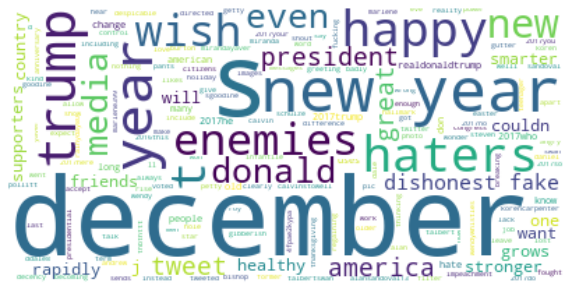

In [ ]:
# instantiate a word cloud object
visual = WordCloud(
    background_color='white',
    max_words=20000,
    stopwords=stop
)
visual.generate(gabung[0])

#visualize
fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(10) # set height

# display the word cloud
plt.imshow(visual, interpolation='bilinear')
plt.axis('off')
plt.show()

visualize which words appear the most (20,000 times appearance)

In [ ]:
for a in ['december', 'new year', 'trump', 'new', 'year', 'haters','december', 'enemies', 'donald', 'wish', 'happy']:
    stop.add(a) # add the words said to stopwords
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'december',
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'donald',
 'down',
 'during',
 'each',
 'else',
 'enemies',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'happy',
 'has',
 "hasn't",
 'haters',
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'new',
 'new year',
 'no',
 'nor',
 'not',
 'of',
 'off

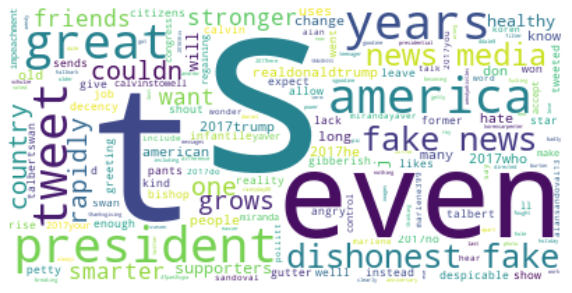

In [ ]:
# instantiate a word cloud object
visual = WordCloud(
    background_color='white',
    max_words=20000,
    stopwords=stop
)
visual.generate(gabung[0])

#visualize
fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(10) # set height

# display the word cloud
plt.imshow(visual, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
for a in ['happy', 'even', 'president', 'great', 'wish', 'america', 'rapidly', 'years', 'country', 'country', 'realdonaldtrump', 'tweet', 'grows', 'great']:
    stop.add(a) # add the words said to stopwords
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'america',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'country',
 'december',
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'donald',
 'down',
 'during',
 'each',
 'else',
 'enemies',
 'even',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'great',
 'grows',
 'had',
 "hadn't",
 'happy',
 'has',
 "hasn't",
 'haters',
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'n

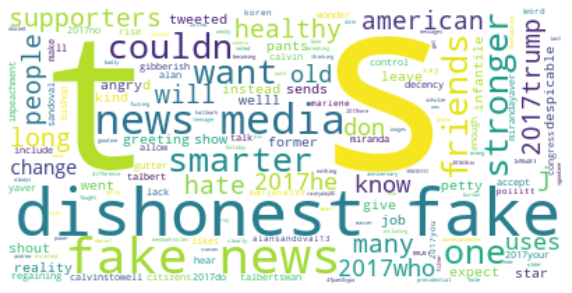

In [ ]:
# instantiate a word cloud object
visual = WordCloud(
    background_color='white',
    max_words=20000,
    stopwords=stop
)
visual.generate(gabung[0])

#visualize
fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(10) # set height

# display the word cloud
plt.imshow(visual, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
from pandas.io.formats.format import StorageOptions
for a in ['smarter', 'healthy','supporters','friends','2017who','2017no','2017he','pants','control','uses','enough','dishonest']:
    stop.add(a) # add the words said to stopwords
StorageOptions

typing.Union[typing.Dict[str, typing.Any], NoneType]

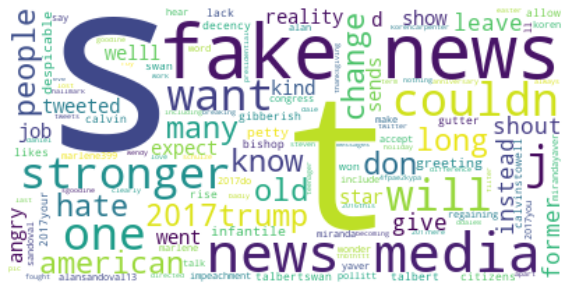

In [ ]:
# instantiate a word cloud object
visual = WordCloud(
    background_color='white',
    max_words=20000,
    stopwords=stop
)
visual.generate(gabung[0])

#visualize
fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(10) # set height

# display the word cloud
plt.imshow(visual, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
for a in ['2017trump', 'stronger','want','calvin','people','many','one','long','gutter','j','bishop','2017your', 'calvinstowell', 'talbert', 'talberswan','american']:
    stop .add(a) # add the words said to stopwords
stop

{'2017he',
 '2017no',
 '2017trump',
 '2017who',
 '2017your',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'america',
 'american',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'bishop',
 'both',
 'but',
 'by',
 'calvin',
 'calvinstowell',
 'can',
 "can't",
 'cannot',
 'com',
 'control',
 'could',
 "couldn't",
 'country',
 'december',
 'did',
 "didn't",
 'dishonest',
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'donald',
 'down',
 'during',
 'each',
 'else',
 'enemies',
 'enough',
 'even',
 'ever',
 'few',
 'for',
 'friends',
 'from',
 'further',
 'get',
 'great',
 'grows',
 'gutter',
 'had',
 "hadn't",
 'happy',
 'has',
 "hasn't",
 'haters',
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'healthy',
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll"

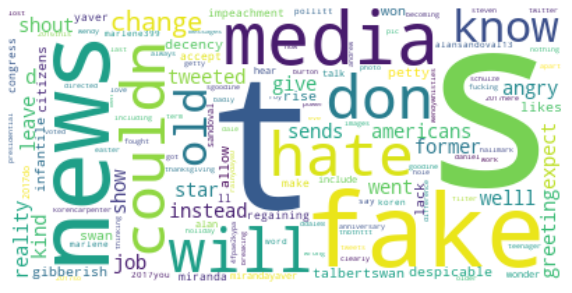

In [ ]:
# instantiate a word cloud object
visual = WordCloud(
    background_color='white',
    max_words=20000,
    stopwords=stop
)
visual.generate(gabung[0])

#visualize
fig = plt.figure()
fig.set_figwidth(10) # set width
fig.set_figheight(10) # set height

# display the word cloud
plt.imshow(visual, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
for a in ['couldn', 't', 'S', 'don', 'americans', 'sandoval', 'niranda', '2017do', 'd', '2016this', 'talbertswan', 'pollitt', 'narlene399','alansandova113', '2017you']:
    stop.add(a) # add the words said to stopwords
stop

{'2016this',
 '2017do',
 '2017he',
 '2017no',
 '2017trump',
 '2017who',
 '2017you',
 '2017your',
 'S',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'alansandova113',
 'all',
 'also',
 'am',
 'america',
 'american',
 'americans',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'bishop',
 'both',
 'but',
 'by',
 'calvin',
 'calvinstowell',
 'can',
 "can't",
 'cannot',
 'com',
 'control',
 'could',
 'couldn',
 "couldn't",
 'country',
 'd',
 'december',
 'did',
 "didn't",
 'dishonest',
 'do',
 'does',
 "doesn't",
 'doing',
 'don',
 "don't",
 'donald',
 'down',
 'during',
 'each',
 'else',
 'enemies',
 'enough',
 'even',
 'ever',
 'few',
 'for',
 'friends',
 'from',
 'further',
 'get',
 'great',
 'grows',
 'gutter',
 'had',
 "hadn't",
 'happy',
 'has',
 "hasn't",
 'haters',
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'healthy',
 'hence',
 'her',
 'here',
 "here's",
 'hers',


In [ ]:
ps = PorterStemmer()
wn = WordNetLemmatizer() #Mendefinisikan Lemmatizer

# Membuuat Sebuah Function Agar Dapat Diterapkan pada DataFrame
def text_proses(teks):
  teks = teks.lower()
  teks = re.sub("@[A-Za-z0-9_]+"," ", teks) #Menghilangkan mention
  teks = re.sub("#[A-Za-z0-9_]+"," ", teks) #Menghilangkan hashtag
  teks = re.sub(r"\\n"," ",teks) #Menghilangkan \n
  teks = teks.strip() #Menghilangkan tab
  teks = re.sub(r"http\S+", " ", teks) #Menghilangkan link
  teks = re.sub(r"www.\S+", " ", teks) #Menghilangkan link
  teks = re.sub("rt"," ",teks) #Menghilangkan RT
  tokens = word_tokenize(teks)
  teks = ' '.join([word for word in tokens if word not in stpwds_en]) #menghilangkan stopwords
  teks = ' '.join([word for word in tokens if word not in stop]) #menghilangkan stopwords yang tidak terdapat di stpwds_en
  teks = ps.stem(teks) #Melakukan stemming
  teks = wn.lemmatize(teks) #Melakukan lematisasi
  teks = re.sub("[^A-Za-z\s']"," ", teks) #Menghilangkan yang bukan huruf
  return teks

make function to screen the dataset

In [ ]:
data['post_process'] = data['text'].apply(lambda x: text_proses(x)) #implement text_process function

In [ ]:
data

,title,text,subject,date,status,post_process
0,Donald Trump Sends Out Embarrassing New Yearâ...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",fake,leave instead give shout fake news media...
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",fake,house intelligence committee chairman devin nu...
2,Sheriff David Clarke Becomes An Internet Joke...,"on friday, it was revealed that former milwauk...",News,"December 30, 2017",fake,friday revealed former milwaukee sheriff dav...
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"on christmas day, donald trump announced that ...",News,"December 29, 2017",fake,christmas day announced back work following ...
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",fake,pope francis used annual christmas day message...
...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,brussels (reuters) - nato allies on tuesday we...,worldnews,"August 22, 2017",true,brussels reuters nato allies tuesday wel...
21413,LexisNexis withdrew two products from Chinese ...,"london (reuters) - lexisnexis, a provider of l...",worldnews,"August 22, 2017",true,london reuters lexisnexis provider leg...
21414,Minsk cultural hub becomes haven from authorities,minsk (reuters) - in the shadow of disused sov...,worldnews,"August 22, 2017",true,minsk reuters shadow disused soviet era ...
21415,Vatican upbeat on possibility of Pope Francis ...,moscow (reuters) - vatican secretary of state ...,worldnews,"August 22, 2017",true,moscow reuters vatican secretary state c...


In [ ]:
data['label'] = data['status'].replace({'fake': 0, 'true':1}) #encoding fake : 0 and true : 1
data

,title,text,subject,date,status,post_process,label
0,Donald Trump Sends Out Embarrassing New Yearâ...,donald trump just couldn t wish all americans ...,News,"December 31, 2017",fake,leave instead give shout fake news media...,0
1,Drunk Bragging Trump Staffer Started Russian ...,house intelligence committee chairman devin nu...,News,"December 31, 2017",fake,house intelligence committee chairman devin nu...,0
2,Sheriff David Clarke Becomes An Internet Joke...,"on friday, it was revealed that former milwauk...",News,"December 30, 2017",fake,friday revealed former milwaukee sheriff dav...,0
3,Trump Is So Obsessed He Even Has Obamaâs Na...,"on christmas day, donald trump announced that ...",News,"December 29, 2017",fake,christmas day announced back work following ...,0
4,Pope Francis Just Called Out Donald Trump Dur...,pope francis used his annual christmas day mes...,News,"December 25, 2017",fake,pope francis used annual christmas day message...,0
...,...,...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,brussels (reuters) - nato allies on tuesday we...,worldnews,"August 22, 2017",true,brussels reuters nato allies tuesday wel...,1
21413,LexisNexis withdrew two products from Chinese ...,"london (reuters) - lexisnexis, a provider of l...",worldnews,"August 22, 2017",true,london reuters lexisnexis provider leg...,1
21414,Minsk cultural hub becomes haven from authorities,minsk (reuters) - in the shadow of disused sov...,worldnews,"August 22, 2017",true,minsk reuters shadow disused soviet era ...,1
21415,Vatican upbeat on possibility of Pope Francis ...,moscow (reuters) - vatican secretary of state ...,worldnews,"August 22, 2017",true,moscow reuters vatican secretary state c...,1


replace fake and true to 0 and 1

0    23481
1    21417
Name: label, dtype: int64


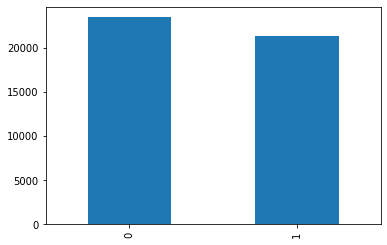

In [ ]:
data['label'].value_counts().plot(kind='bar') #plot total label to see balance status
print(data['label'].value_counts())

check balance between fake and true news and it appears it is quiet balance

In [ ]:
#Menghitung frekuensi kemunculan tiap kata pada data dan dimasukkan ke variabel tmp
tmp = Counter(' '.join(data['post_process']).split(' '))
tmp

Counter({'leave': 3462,
         '': 5293112,
         'instead': 4424,
         'give': 5358,
         'shout': 134,
         'fake': 3382,
         'news': 19637,
         'media': 16165,
         'former': 17925,
         'reality': 2513,
         'show': 8445,
         'star': 2322,
         'job': 4974,
         'sma': 1138,
         'er': 6309,
         'suppo': 25833,
         'ers': 12983,
         'angry': 1324,
         'tweeted': 2340,
         'will': 49447,
         'j': 2966,
         's': 304555,
         'went': 5545,
         'welll': 1,
         'expect': 1882,
         'what': 1371,
         'kind': 3129,
         'sends': 248,
         'greeting': 45,
         'despicable': 180,
         'petty': 222,
         'infantile': 9,
         'gibberish': 12,
         'lack': 1758,
         'decency': 169,
         'won': 6336,
         'allow': 3634,
         'rise': 1658,
         'citizens': 3895,
         'talbe': 2,
         'swan': 22,
         'likes': 673,
         

In [ ]:
#Membuat dataframe yang menyimpan informasi kata dan frekuensi kemunculannya
vocabs = pd.DataFrame({'word':tmp.keys(),'counts':tmp.values()})
vocabs

,word,counts
0,leave,3462
1,,5293112
2,instead,4424
3,give,5358
4,shout,134
...,...,...
102365,engga,1
102366,iasto,1
102367,lukita,1
102368,perusahaan,1


In [ ]:
#Menghitung jumlah kata maksimal dalam satu kalimat
max_len = data['post_process'].str.split(' ').str.len().max()
max_len

16799

### a. Split Data Train, Test, Val, Inf

In [ ]:
train,x_inf,y,y_inf = train_test_split(data.post_process, data.label,train_size=0.9, random_state=1) #split for inference data
train_1,x_test,y_1,y_test = train_test_split(train,y,train_size=0.8, random_state=1) #split for test data
x_train,x_val,y_train,y_val = train_test_split(train_1,y_1,train_size=0.8,random_state=1) #split for train and val data

In [ ]:
tokenizer = text.Tokenizer()
tokenizer.fit_on_texts(x_train)
tokenized_train = tokenizer.texts_to_sequences(x_train)
train_pad = sequence.pad_sequences(tokenized_train, maxlen=max_len) #train tokenize data

In [ ]:
tokenized_val = tokenizer.texts_to_sequences(x_val)
val_pad = sequence.pad_sequences(tokenized_val,maxlen=max_len) #val tokenize data

In [ ]:
tokenized_test = tokenizer.texts_to_sequences(x_test)
test_pad = sequence.pad_sequences(tokenized_test, maxlen=max_len) #test tokenize data

### b. TensorFlow Pipeline

In [ ]:
#pipeline
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).shuffle(1024).cache().batch(64)
val_dataset = tf.data.Dataset.from_tensor_slices((x_val,y_val)).shuffle(1024).cache().batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test)).shuffle(1024).cache().batch(64)

## VIII. Model Definition

In [ ]:
input_dim = len(tokenizer.word_index)+1
input_dim

83377

### a. Model LSTM

In [ ]:
model_lstm = Sequential()
model_lstm.add(Embedding (input_dim=input_dim,
                    input_shape=(16799,),
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_len) )
model_lstm.add(LSTM(64,return_sequences=True))
model_lstm.add(tf.keras.layers.Dropout(0.25))
model_lstm.add(GlobalAveragePooling1D())
model_lstm.add(Dense(32,activation='relu'))
model_lstm.add(Dense(1,activation='sigmoid'))

model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [ ]:
model_lstm.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_9 (Embedding)     (None, 16799, 128)        10672256  
                                                                 
 lstm_8 (LSTM)               (None, 16799, 64)         49408     
                                                                 
 dropout (Dropout)           (None, 16799, 64)         0         
                                                                 
 global_average_pooling1d_5   (None, 64)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_19 (Dense)            (None, 32)                2080      
                                                                 
 dense_20 (Dense)            (None, 1)                 33        
                                                      

## IX. Model Training

### Model LSTM

In [ ]:
lstm_fit = model_lstm.fit(train_pad,
                         y_train.values,
                         epochs=10,
                         validation_data=(val_pad, y_val.values))

Epoch 1/10
809/809 [==============================] - 460s 566ms/step - loss: 0.5788 - accuracy: 0.6662 - val_loss: 0.2105 - val_accuracy: 0.9363
Epoch 2/10
809/809 [==============================] - 458s 567ms/step - loss: 0.1283 - accuracy: 0.9737 - val_loss: 0.0969 - val_accuracy: 0.9702
Epoch 3/10
809/809 [==============================] - 458s 566ms/step - loss: 0.0725 - accuracy: 0.9867 - val_loss: 0.0675 - val_accuracy: 0.9768
Epoch 4/10
809/809 [==============================] - 457s 565ms/step - loss: 0.0498 - accuracy: 0.9974 - val_loss: 0.0550 - val_accuracy: 0.9963
Epoch 5/10
809/809 [==============================] - 461s 570ms/step - loss: 0.0364 - accuracy: 0.9992 - val_loss: 0.0452 - val_accuracy: 0.9972
Epoch 6/10
809/809 [==============================] - 461s 570ms/step - loss: 0.0230 - accuracy: 0.9994 - val_loss: 0.0400 - val_accuracy: 0.9968
Epoch 7/10
809/809 [==============================] - 463s 572ms/step - loss: 0.0284 - accuracy: 0.9985 - val_loss: 0.1462 -

## X. Model Evaluation

### Model LSTM

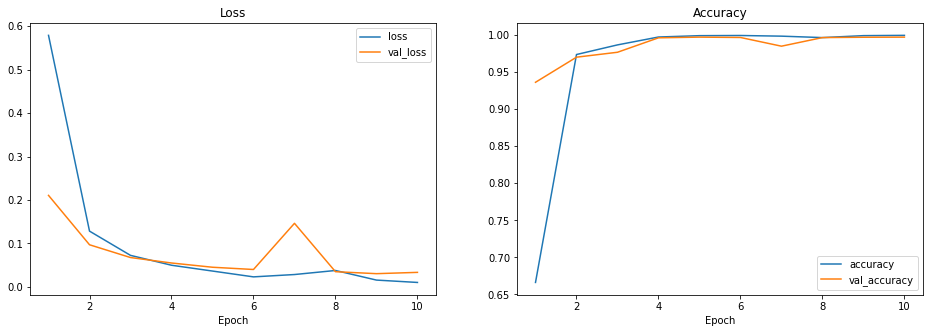

In [ ]:
epoch=10

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),lstm_fit.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),lstm_fit.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),lstm_fit.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),lstm_fit.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

From visualization it is considered data quiet stable but there is exploding in middle

## XI. Model Improvement

### Model Sequence

In [ ]:
model = Sequential()
model.add(Embedding (input_dim=input_dim,
                    input_shape=(16799,),
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_len) )
model.add(GlobalAveragePooling1D())
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

Epoch 1/20
809/809 [==============================] - 20s 24ms/step - loss: 0.6913 - accuracy: 0.5246 - val_loss: 0.6901 - val_accuracy: 0.5200
Epoch 2/20
809/809 [==============================] - 22s 27ms/step - loss: 0.6535 - accuracy: 0.6000 - val_loss: 0.4631 - val_accuracy: 0.9544
Epoch 3/20
809/809 [==============================] - 19s 24ms/step - loss: 0.2464 - accuracy: 0.9374 - val_loss: 0.1665 - val_accuracy: 0.9400
Epoch 4/20
809/809 [==============================] - 19s 23ms/step - loss: 0.1249 - accuracy: 0.9711 - val_loss: 0.1053 - val_accuracy: 0.9794
Epoch 5/20
809/809 [==============================] - 19s 23ms/step - loss: 0.0903 - accuracy: 0.9787 - val_loss: 0.0843 - val_accuracy: 0.9825
Epoch 6/20
809/809 [==============================] - 19s 23ms/step - loss: 0.0658 - accuracy: 0.9862 - val_loss: 0.0773 - val_accuracy: 0.9816
Epoch 7/20
809/809 [==============================] - 19s 23ms/step - loss: 0.0562 - accuracy: 0.9860 - val_loss: 0.0632 - val_accuracy:

In [ ]:
model_seq = model.fit(train_pad,
                         y_train.values,
                         epochs=20,
                         validation_data=(val_pad, y_val.values))

In [ ]:
model.summary()

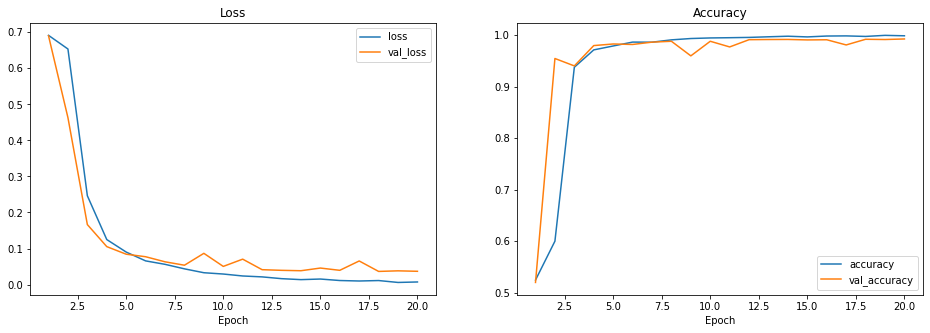

In [ ]:
epoch=20

fig, ax = plt.subplots(ncols=2,figsize=(16,5))
ax[0].plot(range(1,epoch+1),model_seq.history['loss'],label='loss')
ax[0].plot(range(1,epoch+1),model_seq.history['val_loss'],label='val_loss')
ax[0].set_title('Loss')
ax[0].legend()
ax[0].set_xlabel('Epoch')

ax[1].plot(range(1,epoch+1),model_seq.history['accuracy'],label='accuracy')
ax[1].plot(range(1,epoch+1),model_seq.history['val_accuracy'],label='val_accuracy')
ax[1].set_title('Accuracy')
ax[1].legend()
ax[1].set_xlabel('Epoch')

plt.show()

In [ ]:
pred_test = model.predict(test_pad)
pred_test = np.round_(pred_test)
print("Test")
print(classification_report(y_test,pred_test))

253/253 [==============================] - 1s 4ms/step
Test
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4267
           1       0.99      1.00      0.99      3815

    accuracy                           0.99      8082
   macro avg       0.99      0.99      0.99      8082
weighted avg       0.99      0.99      0.99      8082



In [ ]:
# Freezing the final model sequence
model_seq.trainable=False

In [ ]:
#save model functional API
model.save('model_seq_news.h5')

In [ ]:
pred_test = model_seq.predict(test_pad)
pred_test = np.round_(pred_test)

253/253 [==============================] - 58s 226ms/step


In [ ]:
pred_test

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)

In [ ]:
print("Test")
print(classification_report(y_test,pred_test))

Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4267
           1       1.00      1.00      1.00      3815

    accuracy                           1.00      8082
   macro avg       1.00      1.00      1.00      8082
weighted avg       1.00      1.00      1.00      8082



In [ ]:
# Freezing the final model
lstm_fit.trainable=False

In [ ]:
#save model functional API
model_lstm.save('model_lstm.h5')

In [ ]:
#saving stopwords
pickle.dump(stpwds_en, open('stpwds_en.pkl', 'wb'))
pickle.dump(stop, open('stop.pkl', 'wb'))

## XII. Model Inference

In [ ]:
x_inf

4528     calling controversial racially charged policie...
8246     washington   reuters     former republican u s...
10937    re never young commit jihad teachers primary s...
13470    laura ingraham reminds never better vote s ano...
17333    berlin hanover   reuters     germany s social ...
                               ...                        
22081      st century wire says back      election     ...
11574    s wikileaks link references tom perez   tom pe...
1724     washington   reuters     bowed head oval offic...
8123     washington   reuters     u s  republican presi...
16306      reuters        year old daughter jailed viet...
Name: post_process, Length: 4490, dtype: object

In [ ]:
tokenized_test = tokenizer.texts_to_sequences(x_inf)
inf_pad = sequence.pad_sequences(tokenized_test, maxlen=max_len) #inf tokenize data

In [ ]:
inf_pad

array([[    0,     0,     0, ...,    93,    60,  3153],
       [    0,     0,     0, ...,  5011,    18,  1523],
       [    0,     0,     0, ...,   667, 32720, 16963],
       ...,
       [    0,     0,     0, ...,    32,  4798,   598],
       [    0,     0,     0, ...,     2,    21,   449],
       [    0,     0,     0, ...,  5381,   909,  1060]], dtype=int32)

In [ ]:
pred_inf_lstm = model_lstm.predict(inf_pad)
pred_inf_lstm = np.round_(pred_inf_lstm)

141/141 [==============================] - 32s 225ms/step


In [ ]:
print("Test")
print(classification_report(y_inf,pred_inf_lstm))

Test
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2285
           1       0.99      1.00      0.99      2205

    accuracy                           0.99      4490
   macro avg       0.99      0.99      0.99      4490
weighted avg       0.99      0.99      0.99      4490



In [ ]:
pred_inf_model = model.predict(inf_pad)
pred_inf_model = np.round_(pred_test)
print("Test")
print(classification_report(y_test,pred_test))

141/141 [==============================] - 1s 5ms/step
Test
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4267
           1       1.00      1.00      1.00      3815

    accuracy                           1.00      8082
   macro avg       1.00      1.00      1.00      8082
weighted avg       1.00      1.00      1.00      8082



## XIII. Conclusion

From both the model, the best model used to predict if the news is fake or true is using model sequence, even though both model has excellent performance that can be seen from the classification report but the model is not very stable seen from the exploding in the graph. So, it is concluded better used model sequence rather than model LSTM. For improvement of the model, it is considered to feed more news with difference topic to evaluate if the model can keep up or not.